In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout
import matplotlib.pyplot as plt
import random
from tensorflow.keras.datasets import cifar10


In [44]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train_resized = np.array([tf.image.resize(image, (227, 227)).numpy() for image in X_train])
X_test_resized = np.array([tf.image.resize(image, (227, 227)).numpy() for image in X_test])

In [32]:
X_train


array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

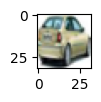

In [14]:
X_train
idx = random.randint(0, 60000)
plt.figure(figsize=(0.7,0.7))  
plt.imshow(X_train[idx, :])
plt.show()

In [16]:
print('Shape of X_train',X_train.shape)
print('Shape of Y_train',y_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of X_test',y_test.shape)



Shape of X_train (50000, 32, 32, 3)
Shape of Y_train (50000, 1)
Shape of X_test (10000, 32, 32, 3)
Shape of X_test (10000, 1)


In [34]:

model = Sequential([
    Conv2D(96, (11, 11), activation='relu', input_shape=(227, 227, 3), strides=4),
    MaxPooling2D((3, 3), strides=2),
    
    Conv2D(256, (5, 5), padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=2),
    
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=2),
    
    Flatten(),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dense(1000, activation='softmax')
])




C:\Users\nasir\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.fit(X_train,y_train,epochs=10,batch_size=64)

In [ ]:
model.evaluate(X_test,y_test)